# **Projeto Avocado**
### **(análise de dados com Python e Pandas)**




---



### **Extração e tratamento dos dados**


In [1]:
# bibliotecas importadas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Formatação dos números
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# dataset que iremos utilizar (foi preciso realizar a conversão na data)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/avocado.csv', \
                 parse_dates=['Date'], date_parser=lambda col: \
                 pd.to_datetime(col, yearfirst=True, errors='coerce'))

In [3]:
'''
Aplicamos a conversão ao formato de data, voltando a coluna data 
para tipo String
'''
df['Date'] = df.Date.dt.strftime('%d/%m/%Y')

In [4]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany
1,1,20/12/2015,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany
2,2,13/12/2015,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany
3,3,06/12/2015,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany
4,4,29/11/2015,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany


In [5]:
'''
Como será preciso novamente aplicar conversão à data (para que tenhamos um campo 
de data para trabalhar), criamos uma coluna de data em formato BR str (só para 
fins acadêmicos)
''' 
df['Data padrão BR'] = df['Date']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce', \
                            format='%d/%m/%Y')

In [6]:
df.dtypes

Unnamed: 0                 int64
Date              datetime64[ns]
AveragePrice             float64
Total Volume             float64
4046                     float64
4225                     float64
4770                     float64
Total Bags               float64
Small Bags               float64
Large Bags               float64
XLarge Bags              float64
type                      object
year                       int64
region                    object
Data padrão BR            object
dtype: object

In [7]:
''' 
Os valores para gramas nos nomes das colunas são aproximados (em onças 
no original)
'''
df = df.rename(columns={"Date": "Data", "AveragePrice": "Preço médio", \
         "Total Volume": "Volume", "4046": "até 150 g", "4225": "até 300 g", \
         "4770": "até 425 g", "Total Bags": "Total de sacolas", \
         "Small Bags": "Sacolas pequenas", "Large Bags": "Sacolas grandes", \
         "XLarge Bags": "Sacolas extragrandes", "type": "Tipo", \
         "year": "Ano", "region": "Cidade"})

In [8]:
df.head(5)

,Unnamed: 0,Data,Preço médio,Volume,até 150 g,até 300 g,até 425 g,Total de sacolas,Sacolas pequenas,Sacolas grandes,Sacolas extragrandes,Tipo,Ano,Cidade,Data padrão BR
0,0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany,27/12/2015
1,1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany,20/12/2015
2,2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany,13/12/2015
3,3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany,06/12/2015
4,4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany,29/11/2015


In [9]:
# Há uma coluna de falso index, que pode ser apagada ...
df.columns

Index(['Unnamed: 0', 'Data', 'Preço médio', 'Volume', 'até 150 g', 'até 300 g',
       'até 425 g', 'Total de sacolas', 'Sacolas pequenas', 'Sacolas grandes',
       'Sacolas extragrandes', 'Tipo', 'Ano', 'Cidade', 'Data padrão BR'],
      dtype='object')

In [10]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [11]:
# Descrição do dataframe
df.describe()

,Preço médio,Volume,até 150 g,até 300 g,até 425 g,Total de sacolas,Sacolas pequenas,Sacolas grandes,Sacolas extragrandes,Ano
count,"18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00"
mean,1.41,"850,644.01","293,008.42","295,154.57","22,839.74","239,639.20","182,194.69","54,338.09","3,106.43","2,016.15"
std,0.40,"3,453,545.36","1,264,989.08","1,204,120.40","107,464.07","986,242.40","746,178.51","243,965.96","17,692.89",0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,015.00"
25%,1.10,"10,838.58",854.07,"3,008.78",0.00,"5,088.64","2,849.42",127.47,0.00,"2,015.00"
50%,1.37,"107,376.76","8,645.30","29,061.02",184.99,"39,743.83","26,362.82","2,647.71",0.00,"2,016.00"
75%,1.66,"432,962.29","111,020.20","150,206.86","6,243.42","110,783.37","83,337.67","22,029.25",132.50,"2,017.00"
max,3.25,"62,505,646.52","22,743,616.17","20,470,572.61","2,546,439.11","19,373,134.37","13,384,586.80","5,719,096.61","551,693.65","2,018.00"


In [12]:
# Verificação de valores nulos ( não existem valores nulos no dataframe )
df.isnull().sum()

Data                    0
Preço médio             0
Volume                  0
até 150 g               0
até 300 g               0
até 425 g               0
Total de sacolas        0
Sacolas pequenas        0
Sacolas grandes         0
Sacolas extragrandes    0
Tipo                    0
Ano                     0
Cidade                  0
Data padrão BR          0
dtype: int64

### **Criação de novas colunas, extraindo informação com groupby**

In [13]:
''' A coluna de receita é calculada por meio da qtd. de 
abacates vendidos X preço médio (aplicamos arredondamento de
duas casas decimais)
'''
df['Receita'] = (df['Volume'].mul(df['Preço médio']))

In [14]:
'''
Podemos criar colunas de porcentagens de tipo do 
abacate vendido (em relação ao volume total)
'''
df['Porcentagem 150 g'] = (df['até 150 g'] / df['Volume']) * 100
df['Porcentagem 300 g'] = (df['até 300 g'] / df['Volume']) * 100
df['Porcentagem 425 g'] = (df['até 425 g'] / df['Volume']) * 100

In [15]:
df.sample(5)

,Data,Preço médio,Volume,até 150 g,até 300 g,até 425 g,Total de sacolas,Sacolas pequenas,Sacolas grandes,Sacolas extragrandes,Tipo,Ano,Cidade,Data padrão BR,Receita,Porcentagem 150 g,Porcentagem 300 g,Porcentagem 425 g
1887,2015-09-13,1.00,"535,519.29","222,536.88","181,246.81","15,103.06","116,632.54","116,569.24",22.02,41.28,conventional,2015,Portland,13/09/2015,"535,519.29",41.56,33.85,2.82
2183,2015-01-04,0.94,"461,607.33","244,152.26","165,299.33","15,302.75","36,852.99","30,884.29","5,595.00",373.70,conventional,2015,SanDiego,04/01/2015,"433,910.89",52.89,35.81,3.32
1824,2015-11-29,1.11,"1,099,646.06","460,759.58","364,748.79","10,648.01","263,489.68","248,449.51","14,157.64",882.53,conventional,2015,Plains,29/11/2015,"1,220,607.13",41.90,33.17,0.97
61,2015-10-25,1.09,"358,478.08","236,814.29","64,607.97",304.36,"56,751.46","31,826.88","24,924.58",0.00,conventional,2015,Atlanta,25/10/2015,"390,741.11",66.06,18.02,0.08
9615,2015-08-02,1.62,"15,286.40",198.92,"14,035.28",0.00,"1,052.20",123.34,928.86,0.00,organic,2015,CincinnatiDayton,02/08/2015,"24,763.97",1.30,91.82,0.00


In [16]:
df['Cidade'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [17]:
# Group by (para todas cidades, por ano, retornando a Receita)
df.groupby(['Cidade', 'Ano'])['Receita'].sum()

Cidade            Ano 
Albany            2015           4,764,513.61
                  2016           7,009,219.01
                  2017           7,947,716.78
                  2018           2,045,274.35
Atlanta           2015          24,515,462.18
                                 ...         
West              2018          91,935,812.48
WestTexNewMexico  2015          32,242,475.24
                  2016          36,941,988.34
                  2017          42,162,256.60
                  2018          10,218,699.01
Name: Receita, Length: 216, dtype: float64

In [18]:
# Poderíamos observar o groupby apenas para uma cidade, por exemplo
seattle = df.loc[df['Cidade'] == 'Seattle']
seattle.groupby(['Ano'])['Receita'].sum()

Ano
2015          33,574,695.94
2016          37,881,884.15
2017          43,265,376.61
2018          10,457,168.62
Name: Receita, dtype: float64

In [19]:
# Qual o preço médio por cidade?
(df.groupby(['Cidade'])['Preço médio'].mean())

Cidade
Albany                                1.56
Atlanta                               1.34
BaltimoreWashington                   1.53
Boise                                 1.35
Boston                                1.53
BuffaloRochester                      1.52
California                            1.40
Charlotte                             1.61
Chicago                               1.56
CincinnatiDayton                      1.21
Columbus                              1.25
DallasFtWorth                         1.09
Denver                                1.22
Detroit                               1.28
GrandRapids                           1.50
GreatLakes                            1.34
HarrisburgScranton                    1.51
HartfordSpringfield                   1.82
Houston                               1.05
Indianapolis                          1.31
Jacksonville                          1.51
LasVegas                              1.38
LosAngeles                            1.22
Loui

In [20]:
# Aproveitando a pesquisa anterior, quais os menores preços médios?
media_preco = (df.groupby(['Cidade'])['Preço médio'].mean())
media_preco.nsmallest(5)

Cidade
Houston                            1.05
DallasFtWorth                      1.09
SouthCentral                       1.10
CincinnatiDayton                   1.21
Nashville                          1.21
Name: Preço médio, dtype: float64

In [21]:
# Por outro lado, as cidades com abacates mais caros são...
media_preco.nlargest(5)

Cidade
HartfordSpringfield                   1.82
SanFrancisco                          1.80
NewYork                               1.73
Philadelphia                          1.63
Sacramento                            1.62
Name: Preço médio, dtype: float64

### **Mais informações com groupby, gráficos e estatísticas**

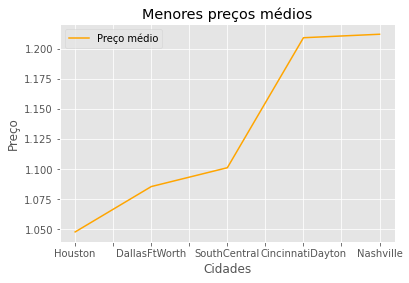

In [22]:
# Os menores preços médios (com as respectivas cidades)
media_preco.nsmallest(5).plot(title='Menores preços médios', color='orange')
# media_preco.nlargest(5).plot()
plt.xlabel('Cidades')
plt.ylabel('Preço')
plt.xticks(rotation='horizontal')
plt.legend();

In [23]:
''' 
A receita, agrupada por ano (os dados de 2018 são
incompletos* ou houve uma queda enorme no consumo...)
'''
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2015       4,488,448,412.51
2016       4,997,589,967.36
2017       5,965,749,982.36
2018       1,482,342,604.63
Name: Receita, dtype: float64

In [24]:
''' 
*vamos verificar os dados de 2018
R: Descobrimos que os dados do ano de 2018 só contemplam
os três primeiros meses ...
'''  
dados2018 = df.loc[df['Data'].dt.year == 2018]
dados2018.groupby(df['Data'].dt.month)['Receita'].sum()

Data
1         492,061,944.34
2         497,770,421.87
3         492,510,238.42
Name: Receita, dtype: float64

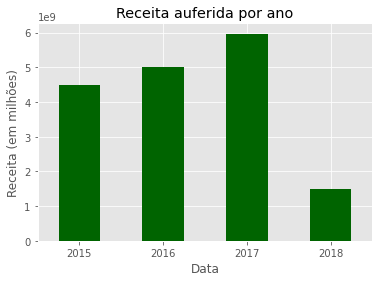

In [25]:
# A receita, agrupada por ano
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.bar(title=\
                               'Receita auferida por ano', color='darkgreen')
plt.xlabel('Data')
plt.ylabel('Receita (em milhões)')
plt.xticks(rotation='horizontal');


In [26]:
# Vamos verificar apenas os três primeiros meses de cada ano
meses3 = df.loc[df['Data'].dt.month.isin([1, 2, 3])]
meses3.groupby(meses3['Data'].dt.year)['Receita'].sum()

Data
2015       1,107,293,513.74
2016       1,185,910,497.41
2017       1,374,615,424.50
2018       1,482,342,604.63
Name: Receita, dtype: float64

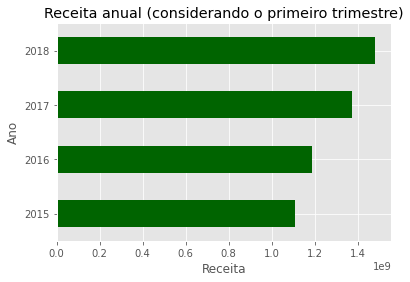

In [27]:
# Ou seja, verificamos que a receita de 2018 não é discrepante
meses3.groupby(meses3['Data'].dt.year)['Receita'].sum().plot.barh(title=\
    'Receita anual (considerando o primeiro trimestre)', color='darkgreen')
plt.xlabel('Receita')
plt.ylabel('Ano');

In [28]:
'''
A receita de alguma cidade específica, separada por mês 
(considerando todos os anos)
'''
city = df.loc[df['Cidade'] == 'Portland']
city.groupby(city['Data'].dt.month)['Receita'].sum()

Data
1           12,031,005.47
2           10,929,358.08
3           11,527,614.11
4            9,043,827.87
5           10,059,661.43
6            8,652,319.29
7           10,003,533.57
8            9,086,821.08
9            7,658,061.17
10           9,110,446.16
11           7,356,463.80
12           7,405,462.74
Name: Receita, dtype: float64

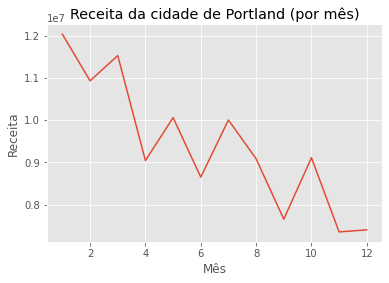

In [29]:
city.groupby(city['Data'].dt.month)['Receita'].sum().plot(title=\
                                    'Receita da cidade de Portland (por mês)')
plt.xlabel('Mês')
plt.ylabel('Receita');

In [30]:
'''
A receita da cidade específica poderia ser separada
por mês, considerando apenas algum ano especificado
'''
city = df.loc[(df['Cidade'] == 'LosAngeles') & (df['Data'].dt.year == 2016)]
city.groupby(city['Data'].dt.month)['Receita'].sum()

Data
1           12,310,473.61
2           10,533,586.13
3           10,230,697.64
4           10,067,161.58
5           12,918,979.20
6           11,711,831.98
7           16,101,335.68
8           12,390,101.76
9           12,043,997.08
10          14,596,021.90
11          10,115,398.47
12           8,879,194.03
Name: Receita, dtype: float64

In [31]:
# Vamos verificar quais as maiores receitas, consideradas as cidades (ou regiões)
(df.groupby('Cidade')['Receita'].sum()).nlargest(10)

Cidade
TotalUS            6,387,593,101.34
California         1,121,414,026.51
West               1,066,833,656.04
Northeast            960,007,873.70
SouthCentral         874,059,289.26
Southeast            703,630,581.04
GreatLakes           688,661,844.27
Midsouth             615,723,838.99
LosAngeles           484,227,610.41
Plains               360,036,649.82
Name: Receita, dtype: float64

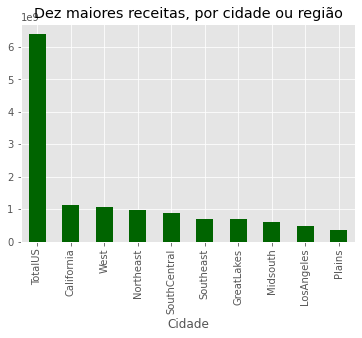

In [32]:
(df.groupby('Cidade')['Receita'].sum()).nlargest(10).plot.bar(title=\
       'Dez maiores receitas, por cidade ou região', color='darkgreen')

In [33]:
df['Cidade'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [34]:
''' 
Voltamos a verificar as maiores receitas, excluindo as regiões
(são verificadas apenas as cidades)
'''
apenas_cidades = df.loc[~df['Cidade'].isin(['GrandRapids', 'GreatLakes',\
                'Midsouth', 'Northeast', 'NorthernNewEngland', 'Plains', \
                'SouthCentral', 'Southeast', 'TotalUS', 'West'])]
(apenas_cidades.groupby('Cidade')['Receita'].sum()).nlargest(10)

Cidade
California                1,121,414,026.51
LosAngeles                  484,227,610.41
NewYork                     335,195,542.05
SanFrancisco                185,834,084.04
BaltimoreWashington         179,908,448.06
Chicago                     179,110,584.76
DallasFtWorth               175,609,297.87
Houston                     165,571,340.23
Denver                      145,982,845.53
PhoenixTucson               138,451,462.02
Name: Receita, dtype: float64

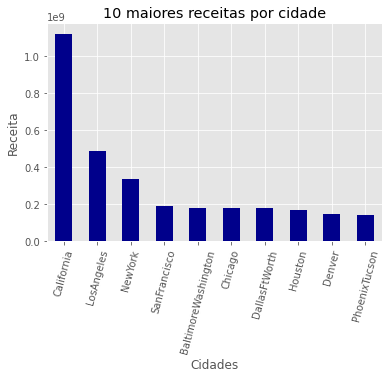

In [35]:
# Dez maiores receitas por cidade
(apenas_cidades.groupby('Cidade')['Receita'].sum()).nlargest(10).plot.bar(title=\
                      '10 maiores receitas por cidade', color='darkblue')
plt.xlabel('Cidades')
plt.ylabel('Receita')
plt.xticks(rotation=75);

In [36]:
# Totais por tipo de sacola: pequena, grande, extragrande
df.groupby(df['Cidade'])[['Sacolas pequenas', 'Sacolas grandes',\
                         'Sacolas extragrandes']].sum()

,Sacolas pequenas,Sacolas grandes,Sacolas extragrandes
Cidade,,,
Albany,"2,246,944.73","389,881.72","43,429.16"
Atlanta,"17,442,735.84","10,839,675.06","278,101.68"
BaltimoreWashington,"34,117,612.92","981,546.79","206,985.36"
Boise,"4,677,932.59","711,028.32","10,449.34"
Boston,"19,910,427.54","1,500,167.27","84,879.99"
BuffaloRochester,"10,268,431.79","1,260,418.90","81,901.94"
California,"229,097,679.89","12,311,935.91","5,272,577.91"
Charlotte,"10,643,851.57","984,487.25","69,603.59"
Chicago,"14,794,653.07","1,691,874.84","378,872.71"


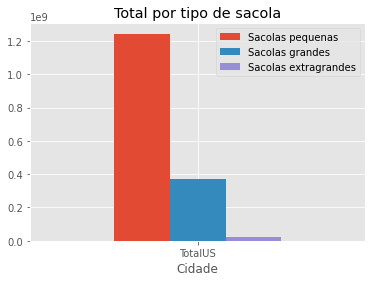

In [37]:
# Os totais por sacola de todo o país (TotalUS), disposto em um gráfico
totalUS = df.loc[df['Cidade'] == 'TotalUS']
totalUS.groupby(totalUS['Cidade'])[['Sacolas pequenas', 'Sacolas grandes',\
                         'Sacolas extragrandes']].sum().plot.bar(title= \
                                                'Total por tipo de sacola')
plt.xticks(rotation='horizontal');

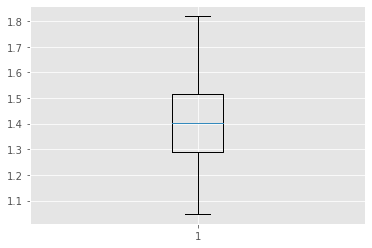

In [38]:
# Estatísticas do preço médio em um boxplot (candle)
cidades = df.groupby('Cidade')['Preço médio'].mean()
plt.boxplot(cidades);

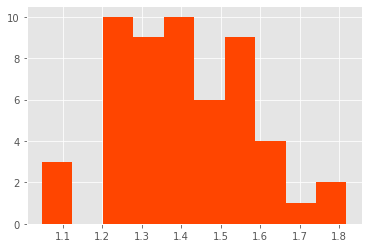

In [39]:
# As mesmas estatísticas do preço médio em um histograma
plt.hist(cidades, color='orangered');

In [40]:
# Podemos baixar as alterações que fizemos no dataframe
df.to_csv('df_avocado_novo.csv', index=False)